# Kaggle - House Price Prediction

This is the notebook for predicting the house prices given more than 80 features,<a herf="https://www.kaggle.com/c/house-prices-advanced-regression-techniques"> a Kaggle competition </a>.
    
This notebook gives a detailed explanation of what I did to predict the house prices. The process is a standard data analysis process, including filling the missing data, feature engineering and model training. The prediction gives an RSME of 0.11, a top 4% of all submissions. This notebook is inspired by <a herf="https://www.kaggle.com/alfredmaboa/advanced-regression-techniques-regularization/data"> this kernel by Alfred</a>. 

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from matplotlib import pyplot as plt

# Load the data

The first step is to load the data and start to understand the data, the questions I want to answer here are 
- the size of the data set
- the number of features 
- any missing data?
- the target 
- what are the features 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# display all the columns
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Here we can see that in this training set, there are in total 79 features, excluding ``Id`` and ``SalePrice``. Therefore, I look into the data description file came along with the data set to get to know more about this data set. This is helpful when correcting the data types and dealing with missing data. Because ``Id`` is not technically a feature, this column will be dropped. And because the ``Id`` column is used in the submission file, the ``Id`` column from test set is saved as a seperate variable. 

In [5]:
Id = test['Id']
train.drop('Id',axis = 1,inplace = True)
test.drop('Id',axis = 1, inplace = True)

## Check missing data 


Before any data processing, I look into the data sets and see if there are any missing values and then analyze one by one. To have a better visualization of how many features have missing data, there is a small function I use. 

In [6]:
def missing_percentage(df):
    """
        This function takes a DataFrame(df) as input and returns two columns, 
        total missing values and total missing values percentage
    """
    total = df.isnull().sum().sort_values(ascending = False)
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    df_missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    df_missing = pd.DataFrame(df_missing[df_missing['Percent']>0])
    return df_missing

In [7]:
percent_miss_train = missing_percentage(train)
percent_miss_train

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


By looking at data_description.txt, most of the features with NA values means they don't have that specific feature, excluding `Electrical`. Therefore, working on the missing values becomes pretty simple,
- fill all `NA` values with `None` for object values and `0` for int values. 
- for `Electrical`, I will use the most frequent value (mode) to fill NA. 

In [8]:
percent_miss_test = missing_percentage(test)
percent_miss_test

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageFinish,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127


In the test sets, more features have missing values, I look into the data description file to decide how to deal with the missing values. 

Most features with missing values in the test set can be filled with None as in the train set. But some features cannot be simply filled in with `None`. They are

- `MSZoning`: general zoning classification; filled with the most frequent one 
- `Utilities`: not mentioned; filled in with the most frequent one 
- `Functional`: assume typical unless deduction are mentioned, so here missing values are filled with typical 
- `KitchenQual`: no mention; filled in with the most frequent one
- `Exterior1st` and `Exterior2nd`: any house should have exteriors; so filled with the most frequent ones
- `SaleType`: not mentioned; filled with the mode 

Missing values in rest features will be filled with `None`. 

Another problem is if I can merge the training and test data sets together and working with them together. Because some missing values are filled with the mode of the feature, if the training and test data sets have different distributions, this would compromise the data sets. Therefore, I decide to deal with the missing values in the training and test data sets seperately. 

# Data processing

## missing values - train

- fill in the missing values in ``Electrical`` using the mode 
- fill in the missing values of other features using ``None`` for objects and ``0`` for numberical features 

### Step 1

In [9]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].value_counts().idxmax())

###  Step 2 

In [10]:
# fill none for object features 
features_fillnone = train[list(percent_miss_train.index)].select_dtypes(include="object").columns
train[features_fillnone] = train[features_fillnone].fillna("None")

# fill int 0 for int features 
features_filli0 = train[list(percent_miss_train.index)].select_dtypes(include="int64").columns
train[features_filli0] = train[features_filli0].fillna(0)

# fill float 0 for float features 
features_fillf0 = train[list(percent_miss_train.index)].select_dtypes(include="float64").columns
train[features_fillf0] = train[features_fillf0].fillna(0.0)

In [11]:
# Check if there are still missing values 
train.isnull().any().sum()

0

## missing values - test

- fill ``Typ`` for the missing values in ``Functional``
- fill in missing values with mode for some features 
- fill in missing values with 0 or None for remaining features 

### Step 1 

In [12]:
test["Functional"].fillna('Typ',inplace = True)

### Step 2 

In [13]:
# features filled with mode 
features_mode = ["MSZoning","Utilities","KitchenQual","Exterior1st","Exterior2nd","SaleType"]

# make sure the feature names are correct 
test[features_mode].isnull().sum()

MSZoning       4
Utilities      2
KitchenQual    1
Exterior1st    1
Exterior2nd    1
SaleType       1
dtype: int64

In [14]:
# fill in the features_mode with mode values 
for feature in features_mode:
    test[feature] = test[feature].fillna(test[feature].value_counts().idxmax())

### Step 3 

In [15]:
# drop features that have already been filled in the percent_miss_test variable 
features_mode.append("Functional")

percent_miss_test.drop(labels=features_mode, inplace=True)

In [16]:
features_fillnone = test[list(percent_miss_test.index)].select_dtypes(include="object").columns
features_filli0 = test[list(percent_miss_test.index)].select_dtypes(include="int64").columns
features_fillf0 = test[list(percent_miss_test.index)].select_dtypes(include="float64").columns

test[features_fillnone] = test[features_fillnone].fillna("None")
test[features_filli0] = test[features_filli0].fillna(0)
test[features_fillf0] = test[features_fillf0].fillna(0.0)

In [17]:
# check if there are any missing values 
missing_percentage(test)

,Total,Percent


## Convert features to right types 

After filling in all the missing values, the next step is to see if all the features have the right data types. I first combine the test and the training sets together to simplify this step. 

In [18]:
# combine the test and train datasets as dataframe_all (short as dfa)
dfa = pd.concat([train,test], ignore_index=False)

In [19]:
# see if all the dtypes are correct
dfa.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [20]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

There are three types of features
- discrete numerical: number of rooms, etc 
- continuous numerical: areas, etc
- object/float: conditions, years sold, etc

I will make lists of each features and convert them to the ideal types 

In [21]:
dfa.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
dfa.select_dtypes(include='int64').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [23]:
dfa.select_dtypes(include='float64').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

There are some numerical features with int values should be categorical

I need to convert them to string

In [24]:
# have a list of features to convert to designated types 
features_string = ["MSSubClass","MoSold","YrSold"]
features_int = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","GarageCars","GarageYrBlt"]
features_float = ['LotArea','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

# convert the features to string 
dfa[features_string] = dfa[features_string].astype(str)
dfa[features_int] = dfa[features_int].astype(np.int64)
dfa[features_float] = dfa[features_float].astype(np.float64)

In [25]:
# check all features that are objects 
dfa.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [26]:
# check all features that are floats 
dfa.select_dtypes(include='float64').columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [27]:
# check all features that are integers 
dfa.select_dtypes(include='int64').columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MiscVal'],
      dtype='object')

In [28]:
# seperate training and test sets again 
train = dfa[dfa['SalePrice'].notnull()]
test = dfa[dfa['SalePrice'].isnull()]


## Feature engineering - numerical features 

I start feature engineering on the numerical features first. The steps are 
- make sure all the numerical features are not skewed
    - ```SalePrice```
    - other numerical features 
- create new features that are more correlated to the ```SalePrice```

### Sale Price 

In [29]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

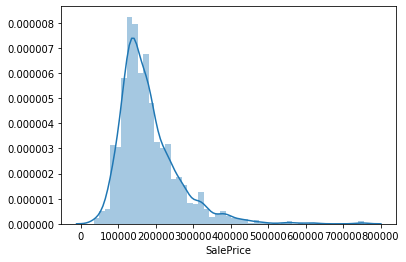

In [30]:
sns.distplot(train['SalePrice']);

From the histogram plot we can see that the ```SalePrice``` is skewed, hence we need to convert is to normal distribution. Since the distribution looks similar to a lognormal disitrbution, so I used log traformation. I chose a simple normal transformation algorithm because in the end the predicted values have to be converted back. 

Skewness: 0.121347
Kurtosis: 0.809519

 mu = 12.02 and sigma = 0.40



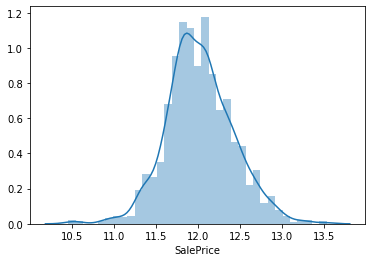

In [31]:
# Apply transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice']);
(mu, sigma) = norm.fit(train['SalePrice'])
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

In [32]:
# seperate the numerical features and the categorical features 
train_num_ft = train.select_dtypes(exclude='object')
train_cat_ft = train.select_dtypes(include='object')
test_num_ft = test.select_dtypes(exclude='object')
test_cat_ft = test.select_dtypes(include='object')

### Correlated Numerical features

First, I look into the features that are correlated with the SalePrice, both positively and negatively. 

In [33]:
def features_key_numerical(df, target, corr_threshold = 0.5,plot_heatmap=False):
    '''find the features that have larger abs(correlations) than the threshold'''
    numericals = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_features_numerical = df.select_dtypes(include = numericals)
    corr = df_features_numerical.corr()
    if plot_heatmap: 
        sns.heatmap(corr);
    features_key = corr[target][np.abs(corr[target])>corr_threshold]
    return features_key

In [34]:
num_ft_corr5 = features_key_numerical(train_num_ft,'SalePrice')


From the list we can see that the quality of the house, the age of the house and multiple types of area of the house have larger impact on the SalePrice.

 

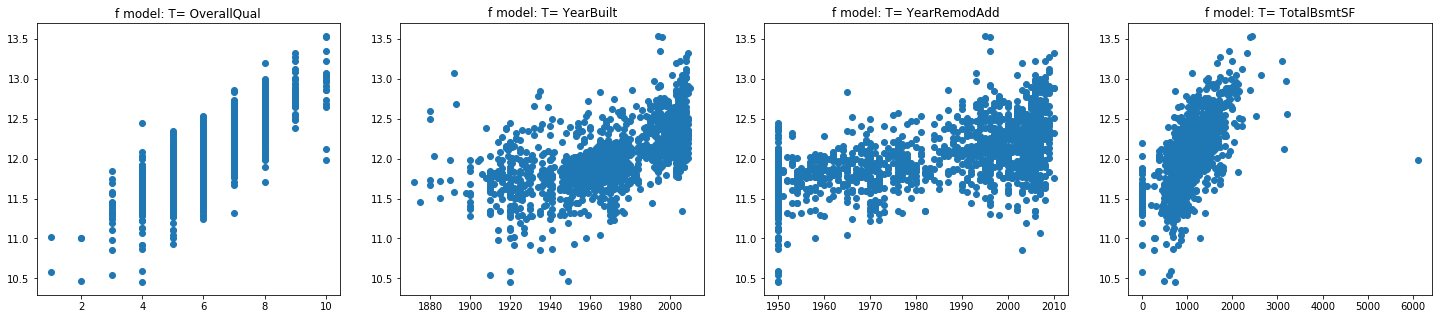

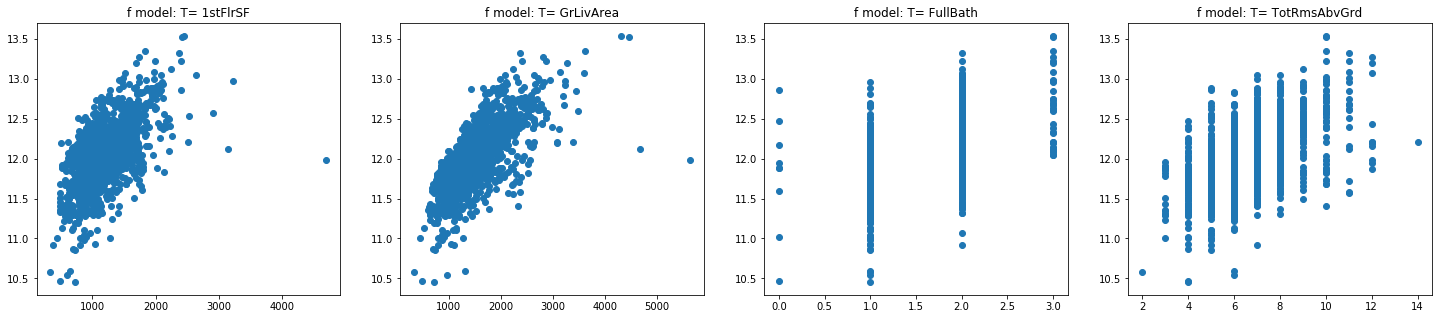

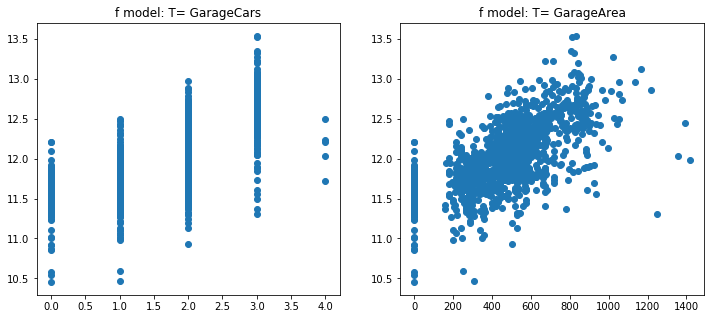

In [35]:
# Plot these features
vars = num_ft_corr5.index[:-1]

figures_per_time = 4
count = 0 
y = train_num_ft['SalePrice']
for var in vars:
    x = train_num_ft[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1 

### skewness correction for other features 

Here I chose to use the Box-Cox transformation to correct any feature with a skewness > 0.5. 

In [36]:
from scipy.stats import skew,boxcox_normmax

In [37]:
ft_float = train_num_ft.select_dtypes(include='float64').columns
ft_float

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [38]:
# correct for the numerical features in training set 
train_num_skew = train_num_ft[ft_float].apply(lambda x: skew(x))
train_num_skew.sort_values(ascending=False)

from scipy.special import boxcox1p

high_skew = train_num_skew[train_num_skew > 0.5]
skew_index = high_skew.index
# Normalise skewed features
for i in skew_index:
    train_num_ft[i] = boxcox1p(train_num_ft[i], boxcox_normmax(train_num_ft[i] + 1))

train_num_ft[ft_float].apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         14.476284
3SsnPorch         7.744137
LowQualFinSF      7.392523
ScreenPorch       3.328194
BsmtFinSF2        2.645006
EnclosedPorch     2.285796
MasVnrArea        0.953281
2ndFlrSF          0.883107
WoodDeckSF        0.776782
OpenPorchSF       0.624656
TotalBsmtSF       0.452285
BsmtFinSF1        0.381851
LotFrontage       0.267547
GarageArea        0.179796
SalePrice         0.121222
BsmtUnfSF         0.053031
GrLivArea         0.005867
1stFlrSF         -0.006599
LotArea          -0.185294
dtype: float64

In [39]:
# skewness correction for test set 
test_num_skew = test_num_ft[ft_float].apply(lambda x: skew(x))
test_num_skew.sort_values(ascending=False)


high_skew = test_num_skew[test_num_skew > 0.5]
skew_index = high_skew.index
# Normalise skewed features
for i in skew_index:
    test_num_ft[i] = boxcox1p(test_num_ft[i], boxcox_normmax(test_num_ft[i] + 1))

test_num_ft[ft_float].apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         15.611957
3SsnPorch        10.593162
LowQualFinSF     10.198412
ScreenPorch       2.985930
BsmtFinSF2        2.511356
EnclosedPorch     2.023573
MasVnrArea        0.993738
2ndFlrSF          0.901641
WoodDeckSF        0.782343
OpenPorchSF       0.610979
BsmtFinSF1        0.357479
GarageArea        0.295986
TotalBsmtSF       0.283398
BsmtUnfSF         0.054273
GrLivArea         0.001969
LotArea          -0.004063
1stFlrSF         -0.014846
LotFrontage      -0.280686
SalePrice              NaN
dtype: float64

After Box-Cox transformation, some features are still skewed, therefore I decide to remove features with a skewness larger than 0.5. But before removing, I will use some of the features to create new features. Because from previous analysis, the area of the house is a kay feature. Hence later I will use some skewed features to create area features. 

In [40]:
# store the features that are skewed

features_to_drop = train_num_skew[train_num_skew > 0.5].index

In [41]:
features_to_drop

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

## Feature engineering - categorical features 

In [42]:
train_cat_ft['SalePrice'] = train_num_ft['SalePrice']

In [43]:
train_cat_ft

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,2,2008,WD,Normal,12.247699
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,5,2007,WD,Normal,12.109016
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,9,2008,WD,Normal,12.317171
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,2,2006,WD,Abnorml,11.849405
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,8,2007,WD,Normal,12.072547
1456,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,2,2010,WD,Normal,12.254868
1457,70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,5,2010,WD,Normal,12.493133
1458,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,4,2010,WD,Normal,11.864469


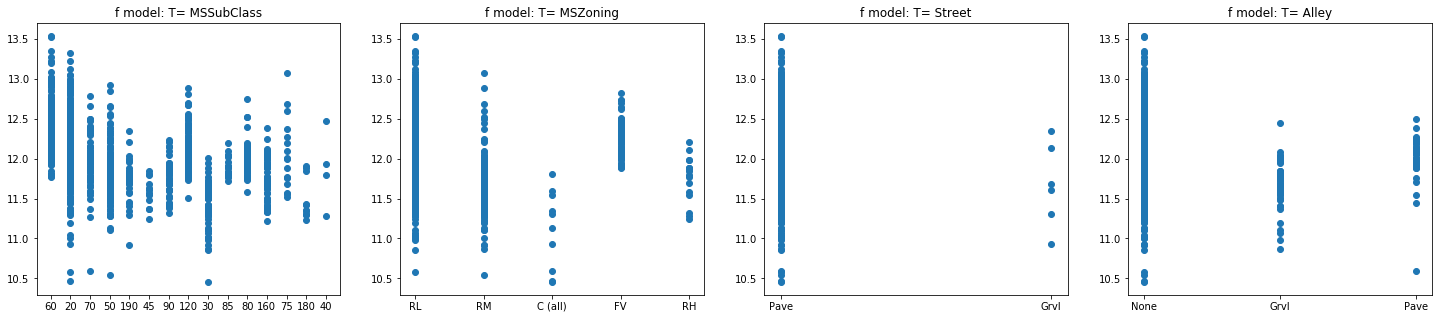

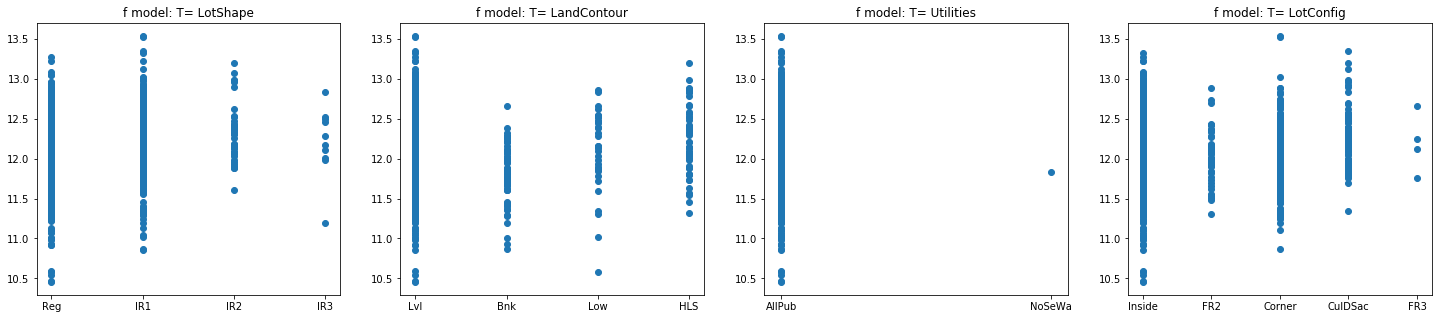

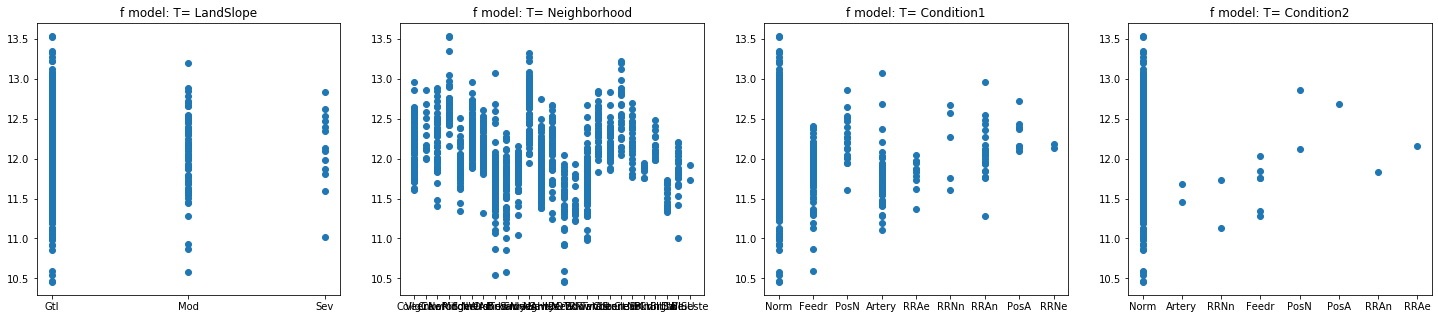

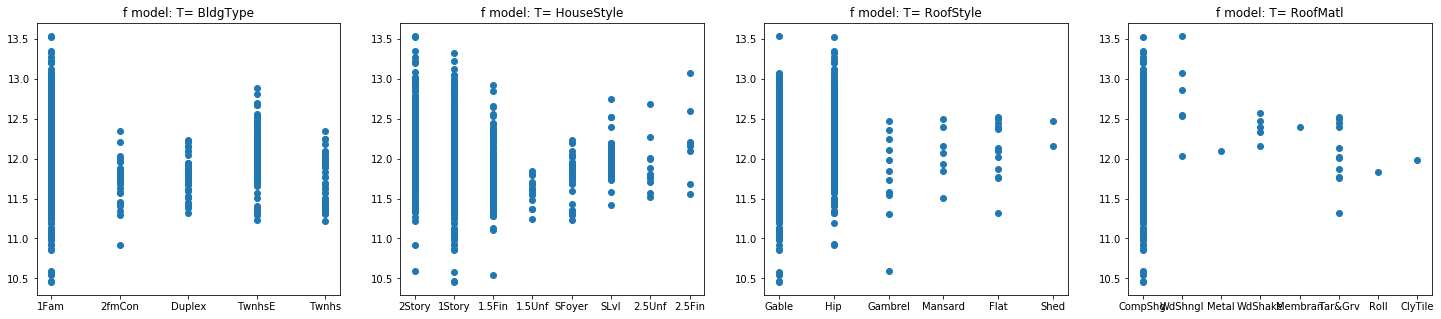

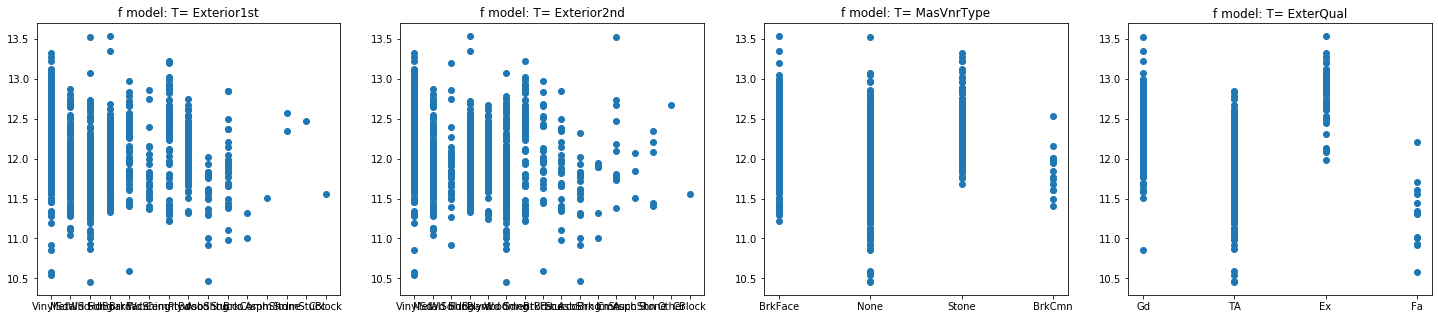

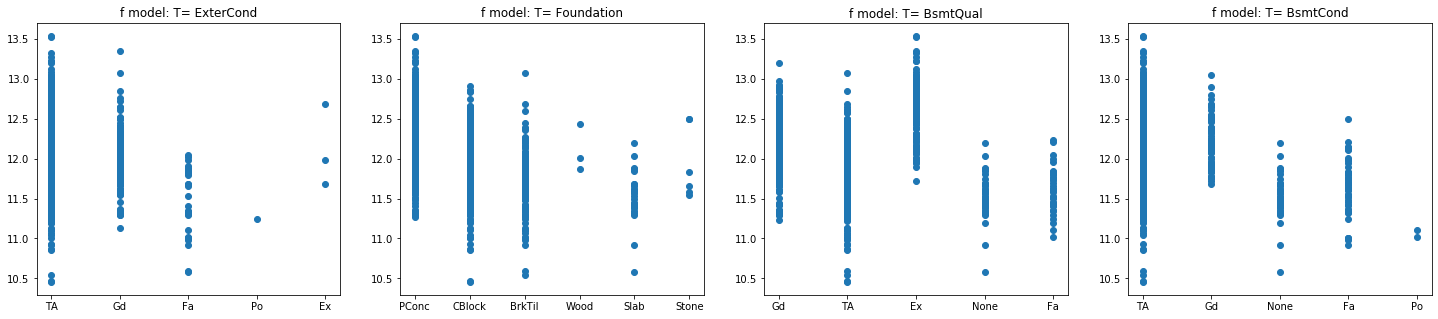

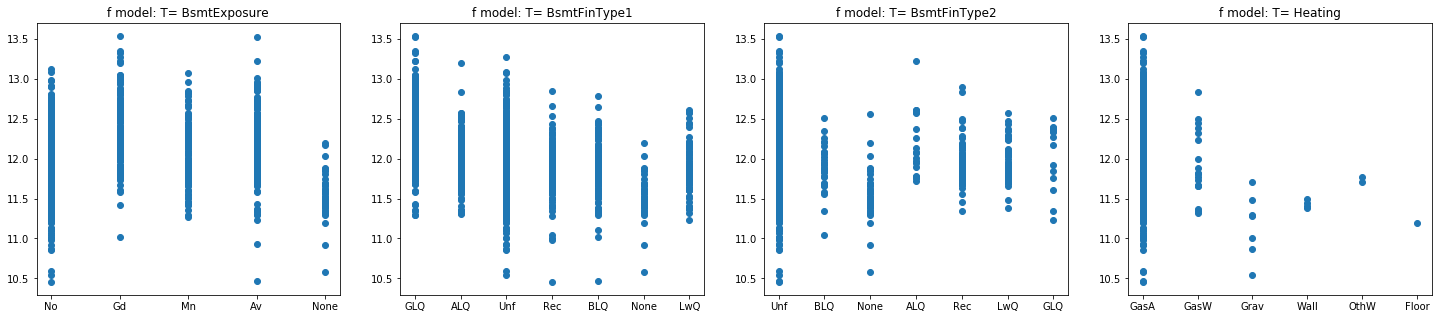

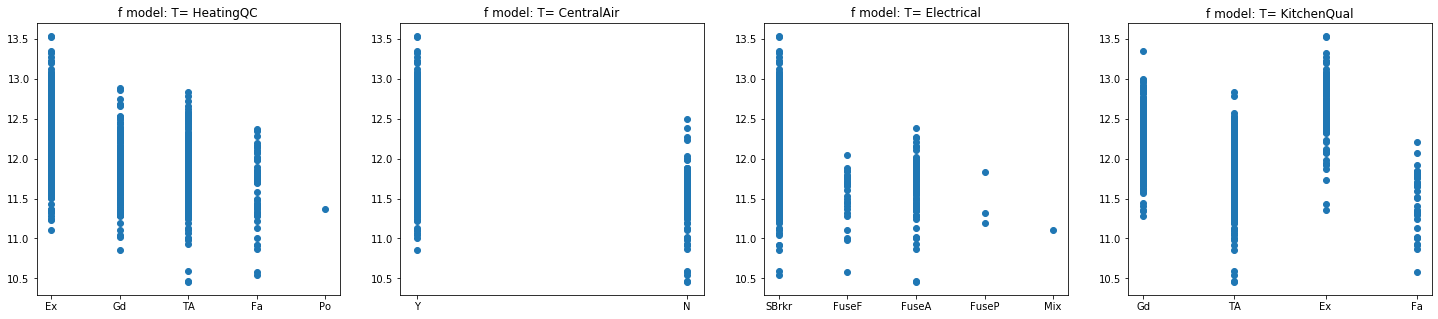

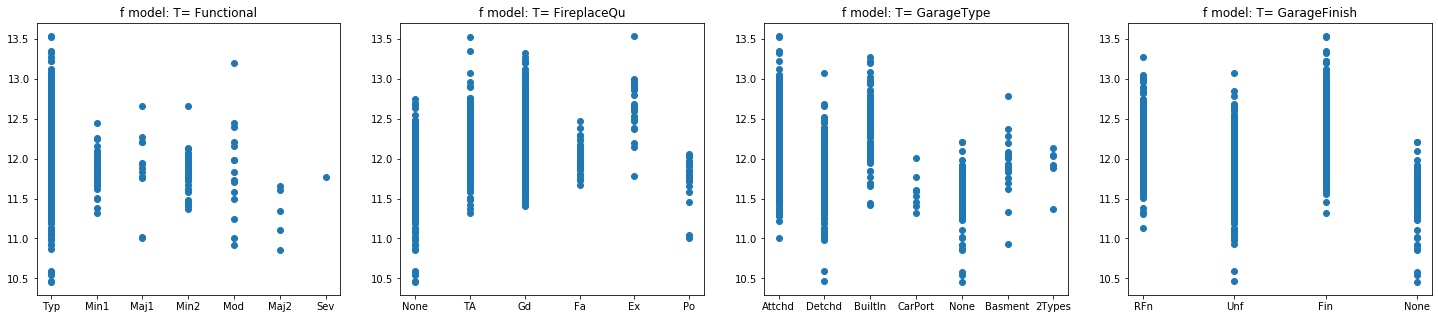

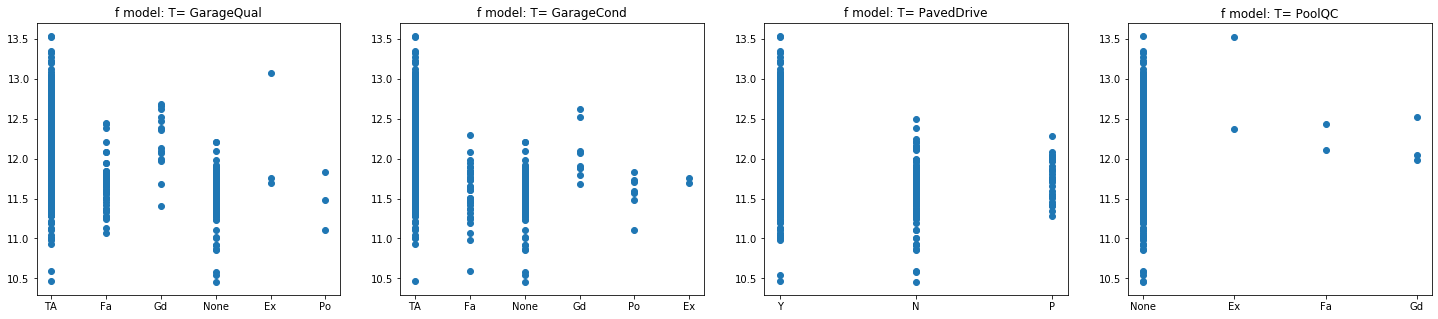

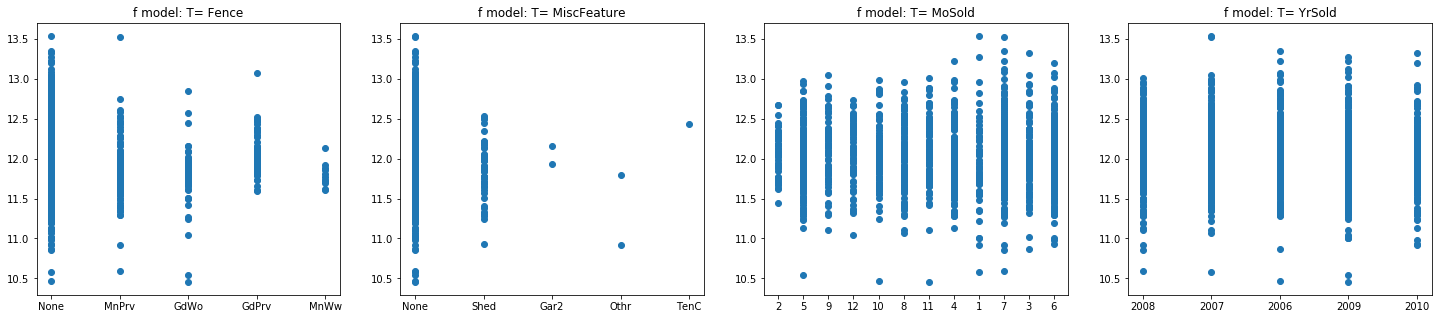

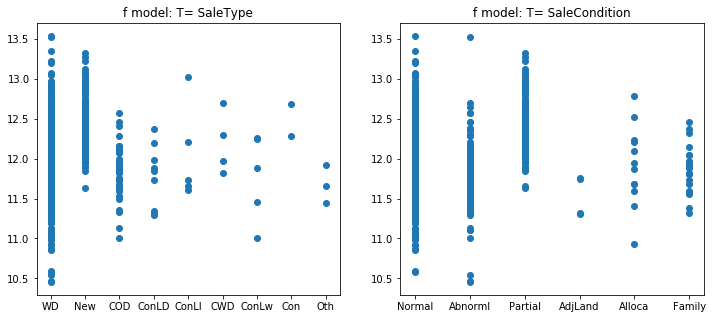

In [44]:
vars = train_cat_ft.columns[:-1]

figures_per_time = 4
count = 0 
y = train_cat_ft['SalePrice']
for var in vars:
    x = train_cat_ft[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1 

Looking at the plots, none of the catogorical features have an obvious correlation with the SalePrice. Their impact on the SalePrice could a combination. Hence I am keeping the categorical features as they are for now and use ``get_dummies`` to convert them. 

In [45]:
train_cat_ft.drop('SalePrice',axis=1,inplace=True)

In [46]:
train_num_ft

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8.670456,7,5,2003,2003,19.340340,118.098015,0.000000,30.319788,252.446470,5.133687,1273.318734,0.0,7.744830,1,0,2,1,3,1,8,0,2003,2,548.0,0.000000,12.049772,0.000000,0.0,0.0,0.0,0,12.247699
1,80.0,8.787628,6,8,1976,1976,0.000000,147.125761,0.000000,44.696312,342.556447,5.348117,0.000000,0.0,7.416976,0,1,2,0,3,1,6,1,1976,2,460.0,62.298509,0.000000,0.000000,0.0,0.0,0.0,0,12.109016
2,68.0,8.933083,7,5,2001,2002,17.687638,91.750448,0.000000,57.687345,267.178841,5.174048,1292.445964,0.0,7.791850,1,0,2,1,3,1,6,1,2001,2,608.0,0.000000,9.878686,0.000000,0.0,0.0,0.0,0,12.317171
3,60.0,8.782836,7,5,1915,1970,0.000000,52.861356,0.000000,65.749917,228.937527,5.198336,1117.828804,0.0,7.749247,1,0,1,0,3,1,7,1,1998,3,642.0,0.000000,8.946970,19.032389,0.0,0.0,0.0,0,11.849405
4,84.0,9.150118,8,5,2000,2000,25.266441,112.267323,0.000000,62.037608,317.335350,5.295030,1592.738738,0.0,8.016605,1,0,2,1,4,1,9,1,2000,3,836.0,46.391564,14.232142,0.000000,0.0,0.0,0.0,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.610572,6,5,1999,2000,0.000000,0.000000,0.000000,92.226297,274.688103,5.193686,1020.162490,0.0,7.704259,0,0,2,1,3,1,7,1,1999,2,460.0,0.000000,9.621565,0.000000,0.0,0.0,0.0,0,12.072547
1456,85.0,9.077728,6,6,1978,1988,15.277563,127.405893,8.337801,69.251677,400.974824,5.612228,0.000000,0.0,7.953154,1,0,2,0,3,1,7,2,1978,2,500.0,69.232041,0.000000,0.000000,0.0,0.0,0.0,0,12.254868
1457,66.0,8.732655,7,9,1941,2006,0.000000,62.328751,0.000000,87.783196,318.859481,5.315197,1753.259551,0.0,8.084492,0,0,2,0,4,1,9,2,1941,1,252.0,0.000000,11.945499,0.000000,0.0,0.0,0.0,2500,12.493133
1458,68.0,8.798745,5,6,1950,1996,0.000000,18.905205,13.765849,0.000000,302.643042,5.261910,0.000000,0.0,7.247348,1,0,1,0,2,1,5,0,1950,1,240.0,71.464105,0.000000,12.946731,0.0,0.0,0.0,0,11.864469


# Combine features 

Here I 
- combine the numerical and categorical features together;
- create new features and drop skewed features and unecessary features; and
- combine the training and test set to gether to get dummies. 

In [47]:
train = pd.concat([train_num_ft,train_cat_ft],axis=1, ignore_index=False )
test = pd.concat([test_num_ft,test_cat_ft],axis=1, ignore_index=False )

# create dfa
dfa = pd.concat([train,test], ignore_index=False)
dfa['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454          NaN
1455          NaN
1456          NaN
1457          NaN
1458          NaN
Name: SalePrice, Length: 2919, dtype: float64

In [48]:
# create new features 
dfa['TotalSF'] = dfa['TotalBsmtSF'] + dfa['1stFlrSF'] + dfa['2ndFlrSF']
dfa['TotalBath'] = dfa['BsmtFullBath'] + dfa['BsmtHalfBath']*0.5 + dfa['FullBath'] + dfa['HalfBath']*0.5
dfa['TotalPorchSF'] = dfa['OpenPorchSF'] + dfa['3SsnPorch'] + dfa['EnclosedPorch'] + dfa['ScreenPorch'] + dfa['WoodDeckSF']

# turn some skewed features to categarical features 
dfa['hasGarage'] = (dfa['GarageYrBlt']>1000).astype('int')
dfa['hasPool'] = dfa['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
dfa['hasBsmt'] = dfa['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dfa['hasFireplace'] = dfa['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

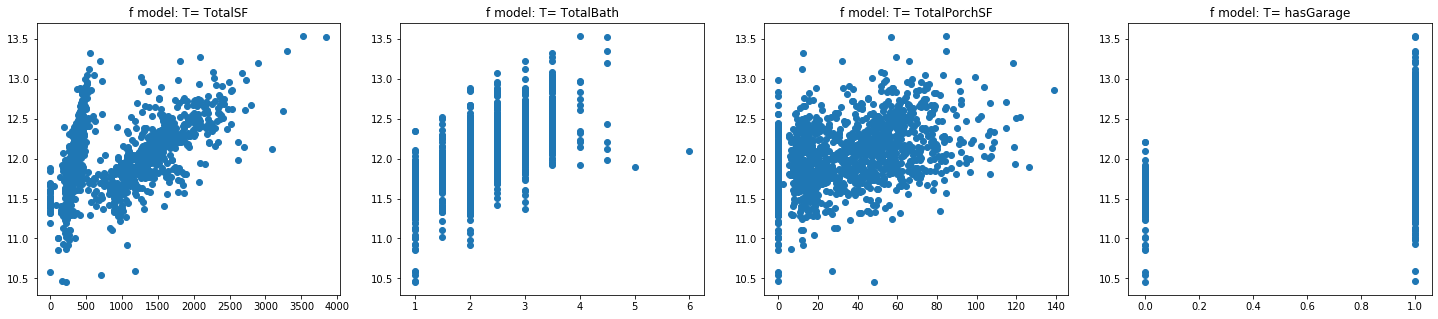

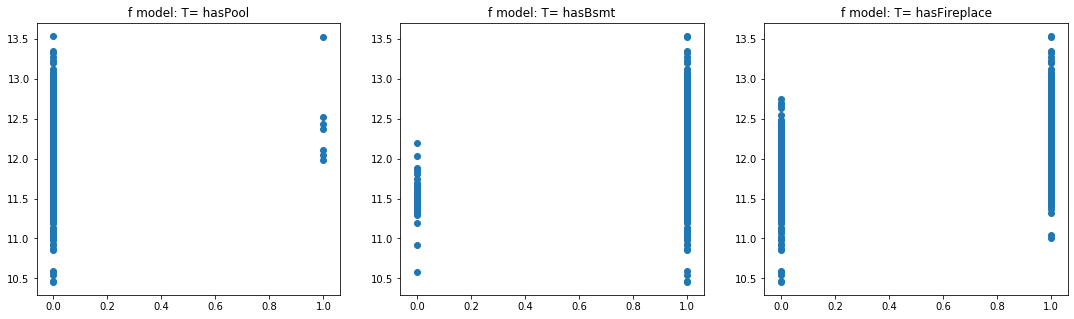

In [49]:
# plot the new features to see if they are useful 
features_add = ['TotalSF','TotalBath','TotalPorchSF','hasGarage','hasPool','hasBsmt','hasFireplace']
vars = features_add

figures_per_time = 4
count = 0 
y = dfa['SalePrice'][dfa['SalePrice'].notnull()]
for var in vars:
    x = dfa[var][dfa['SalePrice'].notnull()]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1 

The new features show correlation with ``SalePrice``, thus these new features are useful. Now I can drop the features that cannot be corrected from skewness. 

In [50]:
# check the features that are about to be dropped
features_to_drop

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

In [51]:
# add features that are no longer needed
features_to_drop_2 = ['FullBath','GarageYrBlt','Fireplaces']

In [52]:
# drop unnecessary features 
dfa.drop(features_to_drop,axis= 1,inplace=True)
dfa.drop(features_to_drop_2,axis= 1,inplace=True)

In [53]:
# convert to dummies
dfa = pd.get_dummies(dfa)

dfa

,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MiscVal,SalePrice,TotalSF,TotalBath,TotalPorchSF,hasGarage,hasPool,hasBsmt,hasFireplace,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attch

In [54]:
# seperate training and test sets
train = dfa[dfa['SalePrice'].notnull()]
test = dfa[dfa['SalePrice'].isnull()]

# Model selection

Because there are many features, I chose to use multiple models to make a robust model. The following models are robust to outliers and use L1 and L2 regularizations. They are **Elastic Net, Lasso, Ridge and Supported Vector Machine** from sklearn library. And **LightGBM**, which is a gradient boosting framework that uses tree based learning algorithms and is more efficient. I also use **stacking CV regression** to stack all the regressors. Finally, I combine all the models with different weights. The hyperparameters used in the models are tested using cross-valication. 



In [55]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [56]:
# model scoring and validation function
def cv_rmse(model,X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

In [57]:
# rmsle scoring function, the same function used to evaluate the submission 
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [58]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

## Hyperparameters 

In [59]:
 # This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


## Pipelines

In [60]:
# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2*2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas*2, cv=kfolds, l1_ratio=e_l1ratio))

# LightGBM regression : more efficient 
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )


svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm,svr),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)





## Model training

In [61]:
# drop the SalePrice in the training set 
X = train.drop('SalePrice',axis=1)

In [62]:
# see the scores when each model is applied individually 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'Svr': svr}

scores = {}

for name, model in models.items():
    model.fit(X, y)
    print(name)
    score = cv_rmse(model, X)
    scores[name] = (score.mean(), score.std())
    print("Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge
Score: 0.1406 (0.0120)

Lasso
Score: 0.1388 (0.0138)

ElasticNet
Score: 0.1387 (0.0137)

lightgbm
Score: 0.1403 (0.0104)

Svr
Score: 0.1513 (0.0116)



## Fit the models

In [63]:
#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model = lightgbm.fit(X, y)
print('Svr')
svr_model = svr.fit(X, y)
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print('----FINISH Fit----',datetime.now())

----START Fit---- 2020-06-16 20:47:08.869692
Elasticnet
Lasso
Ridge
lightgbm
Svr
stack_gen
----FINISH Fit---- 2020-06-16 20:48:09.157769


In [66]:
# blend the models to make a more robust prediction 

def blend_models_predict(X, hyperparas):
    
    return ((hyperparas[0] * elastic_model.predict(X)) + \
            (hyperparas[1] * lasso_model.predict(X)) + \
            (hyperparas[2] * ridge_model.predict(X)) + \
            (hyperparas[3] * lgb_model.predict(X)) + \
            (hyperparas[4] * svr_model.predict(X)) + \
            (hyperparas[5] * stack_gen_model.predict(np.array(X))))

In [67]:
print('RMSLE score on train data:')
hyperparas = [0.15, 0.15, 0.1, 0.2, 0.1, 0.3]
print(rmsle(y, blend_models_predict(X, hyperparas)))

RMSLE score on train data:
0.10976862549393623


## Model prediction 

In [68]:
test.drop(['SalePrice'],axis=1,inplace=True)

In [69]:
# make sure the shape of the test set is the same as that of the training set without the target
print('No. of features in the test set: ', test.shape[1])
print('No. of features in the traning set: ', X.shape[1])

No. of features in the test set:  320
No. of features in the traning set:  320


In [71]:
# prediction 
submission = (np.expm1(blend_models_predict(test,hyperparas)))

# get the sample prediction and fill in my prediction 
prediction = pd.read_csv("sample_submission.csv")
prediction['SalePrice'] = submission

In [72]:
# save the prediction to csv file 
prediction.to_csv('submission_v5.csv',index=False)